<a href="https://colab.research.google.com/github/aditigedam/Russo-Ukrainian-War/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from ast import Num
from numpy import number
import bs4 as bs
import requests
import pandas as pd
import pickle # we can store objects for later use
# for data cleaning
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
# for wordcloud
!pip install matplotlib
!pip install pandas
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
def re_bs(url):
  re = requests.get(url,agent)
  soup = bs.BeautifulSoup(re.content,'lxml')
  return soup

##pickle
def pickle_it(name,data):
  pickle_on = open(name,'wb')
  pickle.dump(data,pickle_on)
  pickle_on.close()

##unpickle
def pickle_out(name):
  pickle_off = open(name,'rb')
  data = pickle.load(pickle_off)
  pickle_off.close()
  return data  

 ##data cleaning
def clean(text):
  text_data = text.lower()
  temp = re.sub('\w*\d\w*', '', text_data)
  temp = re.sub('[%s]' % re.escape(string.punctuation),"",temp)
  text_clean_data = ""
  pattern = r'[0-9]'
  # Match all digits in the string and replace them with an empty string
  temp = re.sub(pattern, '', temp)
  temp = re.sub(r'/','',temp)
  for word in list(temp.split(" ")):
    if word not in stopwords.words('english'):
      if word is not number:
        text_clean_data += word + " "
         
  return text_clean_data


finding most common words from this news articles

In [77]:
key_word_urls = ['https://edition.cnn.com/2022/02/14/world/gallery/ukraine-russia-crisis/index.html',
'https://www.theguardian.com/world/2022/may/23/russia-ukraine-war-what-we-know-on-day-89-of-the-invasion',
'https://en.wikipedia.org/wiki/Russo-Ukrainian_War',
'https://www.bbc.com/news/world-europe-60506682',
'https://timesofindia.indiatimes.com/world/europe/russia-ukraine-war-live-updates-may-23/liveblog/91729070.cms']

In [78]:
sources = ["cnn","theguardian","wikipedia","bbc","timesofindia"]

In [79]:
df = {}
i=0
for url in key_word_urls:
  soup = re_bs(url)
  p_s = soup.find_all('p')
  p_text = ""
  for t in p_s:
    p_text += t.text
  df[sources[i]] = clean(p_text)
  i=i+1    


In [80]:
df

{'bbc': 'visual journalism team  bbc newsrussian forces appear consolidating positions east country using heavy firepower weaken ukraines defences latest developments russia invaded ukraine  february ukrainian forces retook large areas around kyiv early april russia abandoned push towards capitalfollowing withdrawal north ukraine russia refocused efforts taking control east south countrythe uk ministry defence mod says russia likely suffered similar death toll first three months ukraine operation experienced soviet union nine year war afghanistanit says combination factors led high number casualties including poor tactics limited air coverrussian officials said forces fighting complete liberation donbas broadly refers ukraines eastern regions donetsk luhansk russianbacked separatists held significant territory invasion focus russian forces recent weeks around city izyum east towards severodonetsk russian troops taken control rubizhne popasna move surround target severodonetsk north how

In [81]:
data = pd.DataFrame([df]).transpose()
data.columns = ['Content']

In [82]:
data

,Content
cnn,updated gmt hkt may months military buildu...
theguardian,kyiv says agree ceasefire involves handing ter...
wikipedia,\n\nchanges prior invasion\ncivilian casualti...
bbc,visual journalism team bbc newsrussian forces...
timesofindia,russian forces tuesday stepped offensive last ...


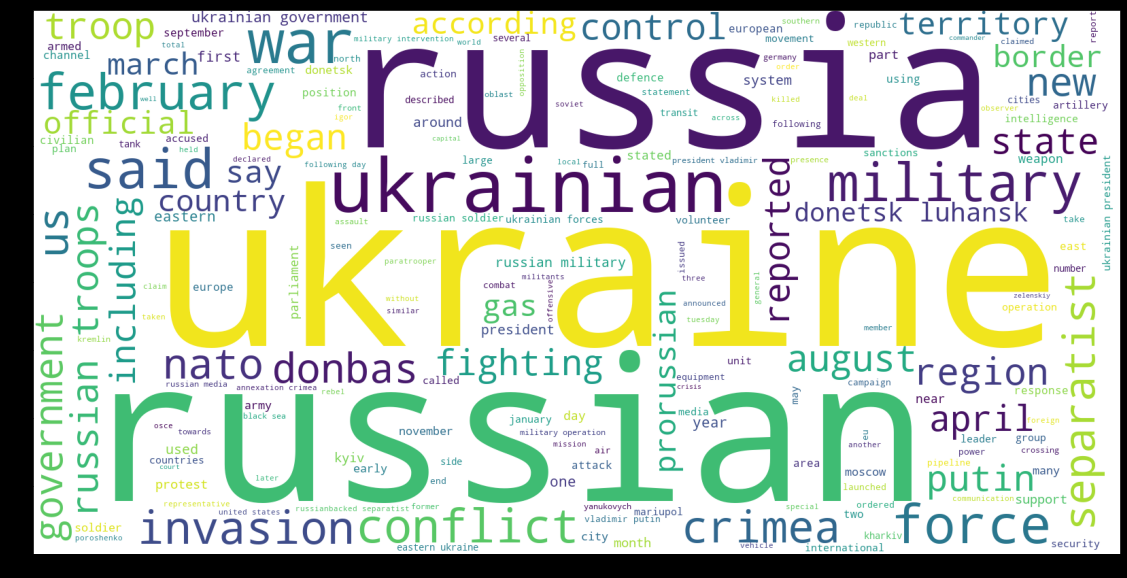

In [85]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(data['Content'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [86]:
## convert it into Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(data.Content)
data_cv = pd.DataFrame(df_cv.toarray(),columns = cv.get_feature_names())
# data_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
data_cv.index = data.index

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
data_cv.iloc[0:5,0:30]

,abandon,abandoned,abandoning,abbreviated,ability,abkhazia,able,absentia,abuses,accede,...,achievedtwo,acknowledged,aclrev,acre,acting,action,actions,active,activists,activities
cnn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
theguardian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wikipedia,1,1,1,1,1,2,1,0,1,2,...,0,1,1,0,2,2,7,2,1,1
bbc,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
timesofindia,0,0,0,0,0,0,1,2,0,0,...,1,0,0,0,0,0,1,0,0,0


In [96]:
## picking top 15 words form source
topWords = {}
for c in sources:
  top = data_cv.loc[c].sort_values(ascending=False).head(15)
  topWords[c] = list(top.index)
  print(f'''{c} : {topWords[c]}''')  

cnn : ['military', 'ukraine', 'invasion', 'united', 'western', 'viewer', 'powers', 'equipment', 'escalation', 'thousands', 'central', 'russias', 'sanctions', 'sparked', 'tightening']
theguardian : ['ukraine', 'russia', 'said', 'war', 'ukrainian', 'russian', 'zelenskiy', 'president', 'territory', 'invasion', 'uk', 'eastern', 'minister', 'military', 'foreign']
wikipedia : ['russian', 'ukraine', 'ukrainian', 'russia', 'military', 'government', 'forces', 'war', 'crimea', 'troops', 'february', 'said', 'conflict', 'president', 'nato']
bbc : ['forces', 'russian', 'ukrainian', 'russia', 'ukraine', 'control', 'troops', 'city', 'bbc', 'east', 'donetsk', 'areas', 'using', 'sea', 'defence']
timesofindia : ['ukraine', 'tuesday', 'war', 'said', 'russia', 'says', 'russian', 'president', 'donbas', 'offensive', 'moscow', 'ukrainian', 'months', 'conflict', 'eastern']


In [98]:
top_words = {}
for s in sources:
  for word in topWords[s]:
    top_words[word] = 1;

In [101]:
words = []
for i in top_words:
  words.append(i)

In [102]:
print(words)

['military', 'ukraine', 'invasion', 'united', 'western', 'viewer', 'powers', 'equipment', 'escalation', 'thousands', 'central', 'russias', 'sanctions', 'sparked', 'tightening', 'russia', 'said', 'war', 'ukrainian', 'russian', 'zelenskiy', 'president', 'territory', 'uk', 'eastern', 'minister', 'foreign', 'government', 'forces', 'crimea', 'troops', 'february', 'conflict', 'nato', 'control', 'city', 'bbc', 'east', 'donetsk', 'areas', 'using', 'sea', 'defence', 'tuesday', 'says', 'donbas', 'offensive', 'moscow', 'months']


In [122]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/datasets/common_words.pickle",words)

In [123]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/datasets/data_coupus.pickle",data)
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/datasets/data_document_term_matrix.pickle",data_cv)

Scrapping 20 news websites

In [105]:
all_urls = []

google news
= "https://news.google.com/topstories?hl=en-IN&gl=IN&ceid=IN:en

In [106]:
url_google = "https://news.google.com/topics/CAAqKggKIiRDQkFTRlFvSUwyMHZNRGx1YlY4U0JXVnVMVWRDR2dKSlRpZ0FQAQ?hl=en-IN&gl=IN&ceid=IN%3Aen"
soup_google = re_bs(url_google)

In [114]:
# Extracting all urls from this site
urls_in_google = []
c=0
a = soup_google.find_all('a')
for aa in a:
  try:
    s = aa['href']
    if s[2:9] != ("article" or "stories"):
      c
      # print(ss)
    else:
      ss = "https://news.google.com/" + s[2:]
      urls_in_google.append(ss)
    # print(aa['href'])
  except:
    c 

In [115]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/urls/urls_in_google.pickle",urls_in_google)

Yahoo News
https://news.yahoo.com/world/

In [116]:
# Extracting  all urls from this site
soup_yahoo = re_bs('https://news.yahoo.com/world/')
urls_in_yahoo = []

a_s = soup_yahoo.find_all('a')
for a in a_s:
  try:
    if a['href'][0:5] != "https":
      s = 'https://news.yahoo.com/world/' + a['href']
      urls_in_yahoo.append(s)
  except:
    a_s

In [118]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/urls/urls_in_yahoo",urls_in_yahoo)

In [119]:
all_urls = urls_in_yahoo + urls_in_google

In [120]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/urls/_all_urls.pickle",all_urls)

Preparing data set

In [121]:
dict = {}
for url in all_urls:
  soup = re_bs(url)
  all_ps = soup.find_all('p')
  c=0
  t=0
  for p in all_ps:
    # print(p.text)
    text = p.text
    for word in list(text.split()):
      t= t+1
      if word.lower() in words:
        c=c+1;
        # print(word.lower())
    # print(text)
  if t!=0:
    dict[url] = c/t

In [125]:
sorted_dict = sorted(dict.items(), key=lambda x:x[1],reverse=True)

In [126]:
url_data = []
for i in range(20):
  url_data.append(sorted_dict[i][0])

In [ ]:
data_text = ""
for url in url_data:
  soup = re_bs(url)
  all_ps = soup.find_all('p')
  for p in all_ps:
    data_text += p.text
    data_text +='\n'

  data_text+="\n"  

print(data_text)    

In [130]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/text/data_text.pickle",data_text)

text summarization

In [132]:
# Cleaning
text_clean_data = clean(text_data)

In [ ]:
print(text_clean_data)

In [134]:
word_freq = {}
for word in list(text_clean_data.split()):
  try:
    word_freq[word] += 1
  except:
    word_freq[word] = 1; 

In [135]:
print(word_freq)

{'davos': 23, 'veteran': 5, 'russian': 216, 'diplomat': 10, 'un': 17, 'office': 22, 'geneva': 8, 'says': 23, 'handed': 4, 'resignation': 6, 'sending': 5, 'scathing': 4, 'letter': 8, 'foreign': 25, 'colleagues': 4, 'inveighing': 2, '“aggressive': 3, 'war': 134, 'unleashed”': 2, 'president': 100, 'vladimir': 43, 'putin': 92, 'ukraine': 203, 'boris': 8, 'bondarev': 8, 'confirmed': 8, 'in': 21, 'american': 1, 'fastfood': 1, 'giant': 1, 'mcdonalds': 2, 'exit': 3, 'market': 2, 'sell': 5, 'business': 16, 'increasingly': 11, 'isolated': 2, 'country': 34, 'company': 4, 'said': 249, 'monday': 50, 'many': 27, 'western': 37, 'businesses': 5, 'pulled': 2, 'russia': 117, 'since': 38, 'invasion': 46, 'february': 16, 'an': 5, 'indian': 7, 'student': 2, 'moscow': 39, 'describes': 2, 'life': 8, 'impacted': 2, 'four': 11, 'months': 22, 'visuals': 1, 'ground': 8, 'show': 4, 'ghastly': 1, 'get': 20, 'dmytro': 16, 'kozatskiazov': 10, 'special': 25, 'forces': 70, 'regiment': 12, 'ukrainian': 106, 'national':

In [137]:
sentences = []
temp = ""
for word in list(text_data.split()):
  if word[len(word) -1] == ".":
    # print(word)
    temp+=word
    sentences.append(temp)
    temp = ""
  else:
    temp += word + " " 

In [138]:
print(sentences)

['DAVOS: A veteran Russian diplomat to the UN Office at Geneva says he handed in his resignation before sending out a scathing letter to foreign colleagues inveighing against the “aggressive war unleashed” by Russian President Vladimir Putin in Ukraine.', "Boris Bondarev, 41, confirmed his resignation in American fast-food giant McDonald's will exit the Russian market and sell its business in the increasingly isolated country, the company said Monday.", 'Many Western businesses have pulled out of Russia since its invasion of Ukraine in February.', 'An Indian student in Moscow describes how life there has been impacted by the Ukraine war Four months into the Russian invasion of Ukraine, visuals from the ground show how ghastly a war can get.', '(Dmytro Kozatski/Azov Special Forces Regiment of the Ukrainian National Guard Press Office via AP) Now a prisoner of war, a Ukrainian Photographer-soldier Dmytro Kozatsky has captured the horrific ramifications of the Russian invasion of Ukraine.

In [139]:
sen_score = {}
for i in range(len(sentences)):
  sum=0
  for word in list(sentences[i].split(' ')):
    try:
      sum += word_freq[word]
    except:
      sum
  sen_score[sentences[i]] = sum/(len(sentences[i]))

In [140]:
print(sen_score)

{'DAVOS: A veteran Russian diplomat to the UN Office at Geneva says he handed in his resignation before sending out a scathing letter to foreign colleagues inveighing against the “aggressive war unleashed” by Russian President Vladimir Putin in Ukraine.': 1.900398406374502, "Boris Bondarev, 41, confirmed his resignation in American fast-food giant McDonald's will exit the Russian market and sell its business in the increasingly isolated country, the company said Monday.": 2.9545454545454546, 'Many Western businesses have pulled out of Russia since its invasion of Ukraine in February.': 1.3695652173913044, 'An Indian student in Moscow describes how life there has been impacted by the Ukraine war Four months into the Russian invasion of Ukraine, visuals from the ground show how ghastly a war can get.': 3.3025641025641024, '(Dmytro Kozatski/Azov Special Forces Regiment of the Ukrainian National Guard Press Office via AP) Now a prisoner of war, a Ukrainian Photographer-soldier Dmytro Kozat

In [141]:
avg =0;
for i in sen_score:
  # print(sen_score[i])
  avg+=sen_score[i]

avg = avg/(len(sen_score))  
print(avg)

1.7798017774789274


In [143]:
text_summary_avg = ""
for i in sen_score:
  if sen_score[i]>avg:
    text_summary_avg += i

print(text_summary_avg)

DAVOS: A veteran Russian diplomat to the UN Office at Geneva says he handed in his resignation before sending out a scathing letter to foreign colleagues inveighing against the “aggressive war unleashed” by Russian President Vladimir Putin in Ukraine.Boris Bondarev, 41, confirmed his resignation in American fast-food giant McDonald's will exit the Russian market and sell its business in the increasingly isolated country, the company said Monday.An Indian student in Moscow describes how life there has been impacted by the Ukraine war Four months into the Russian invasion of Ukraine, visuals from the ground show how ghastly a war can get.Kozatsky posted several images from his collection on his Twitter handle before he joined the troops from the Ukraine side.(Dmytro Kozatski/Azov Special Forces Regiment of the Ukrainian National Guard Press Office via AP) He was one of hundred soldiers who marched out of the Azovstal mill in Mariupol carrying the wounded and picking up pieces amid the Ru

In [144]:
sorted_sen_score = sorted(sen_score.items(), key=lambda x:x[1],reverse=True)

In [145]:
l = int(len(sorted_sen_score)/10)
text_summary_custom = ""
for i in range(l):
  text_summary_custom += sorted_sen_score[i][0]

print(text_summary_custom)

Adam Kinzinger said of the incendiary post.Others were said to be hospitalised.As the war drags on, the economic toll around the world goes higher.Russia said the Azov commander was taken away from the plant in an armoured vehicle.Two members of the ruling United Russia party who introduced the law said the move would enable the military to utilise the skills of older professionals.In his remarks to the audience in Davos, Zelenskiy also said that war came at a huge human price for Ukrainians.military leaders said on Monday after a meeting with allies who made new pledges of weaponry.“This is not just about Ukraine,” Beasley said last week.President Joe Biden said at a meeting of the Quad grouping of countries in Tokyo on May 24.Zelenskiy said in a question-and-answer video link with the audience at the World Economic Forum in Davos.Duterte said he was concerned about the stability of his country’s oil supply as the war in Ukraine continues to rage and spark global instability.Biden sai

In [148]:
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/datasets/sen_score.pickle",sen_score)
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/datasets/sentences.pickle",sentences)
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/text/text_summary_custom.pickle",text_summary_custom)
pickle_it("/content/drive/MyDrive/datasets/PROJECT1/text/text_summary_avg.pickle",text_summary_avg)